In [ ]:
#assignment 5

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 112ms/step - accuracy: 0.7970 - loss: 0.6481 - val_accuracy: 0.9815 - val_loss: 0.0559
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 105ms/step - accuracy: 0.9699 - loss: 0.0998 - val_accuracy: 0.9876 - val_loss: 0.0400
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 99ms/step - accuracy: 0.9790 - loss: 0.0693 - val_accuracy: 0.9884 - val_loss: 0.0337
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9843 - loss: 0.0526 - val_accuracy: 0.9900 - val_loss: 0.0302
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 105ms/step - accuracy: 0.9857 - loss: 0.0470 - val_accuracy: 0.9882 - val_loss: 0.0303
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 99ms/step - accuracy: 0.9878 - loss: 0.0399 - val_accuracy: 0.9916 - val_loss: 0.0253
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9891 - loss: 0.0339 - val_accuracy: 0.9917 - val_loss: 0.0247
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.9901 - loss: 0.03

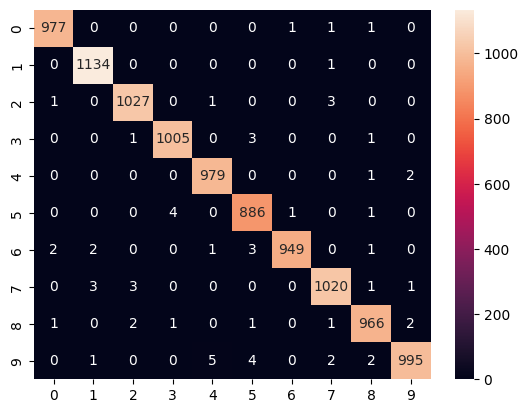

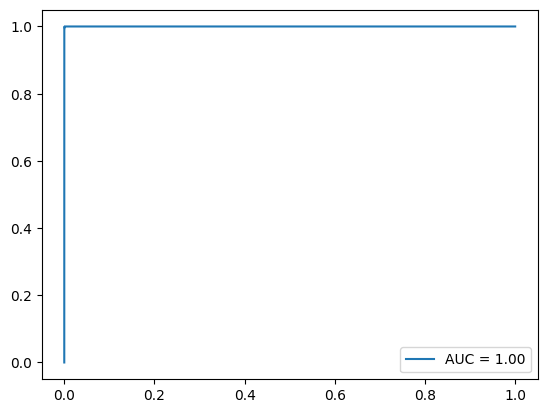

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 160ms/step - accuracy: 0.2852 - loss: 1.9263 - val_accuracy: 0.5139 - val_loss: 1.3553
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 156ms/step - accuracy: 0.4839 - loss: 1.4144 - val_accuracy: 0.5927 - val_loss: 1.1723
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 150ms/step - accuracy: 0.5509 - loss: 1.2545 - val_accuracy: 0.6143 - val_loss: 1.0856
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 147ms/step - accuracy: 0.5808 - loss: 1.1727 - val_accuracy: 0.6248 - val_loss: 1.0886
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 85s 155ms/step - accuracy: 0.6090 - loss: 1.1088 - val_accuracy: 0.6419 - val_loss: 1.0151
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 155ms/step - accuracy: 0.6225 - loss: 1.0672 - val_accuracy: 0.6777 - val_loss: 0.9257
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 154ms/step - accuracy: 0.6502 - loss: 1.0051 - val_accuracy: 0.6785 - val_loss: 0.9224
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 148ms/step - accuracy: 0.6647 - loss: 0

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import seaborn as sns

# Task 1: Image Compression

def compress_image(image_path, output_path_jpeg, output_path_png):
    img = cv2.imread(image_path)

    # Lossy Compression (JPEG)
    cv2.imwrite(output_path_jpeg, img, [cv2.IMWRITE_JPEG_QUALITY, 50])

    # Lossless Compression (PNG)
    cv2.imwrite(output_path_png, img, [cv2.IMWRITE_PNG_COMPRESSION, 9])

compress_image('/content/corner.jpeg.jpg', 'compressed.jpeg', 'compressed.png')

# Task 2: CNN on MNIST

def train_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=128)

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print(classification_report(y_true, y_pred_classes))
    cm = confusion_matrix(y_true, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.legend()
    plt.show()

train_mnist()

# Task 2: CNN on CIFAR-10

def train_cifar10():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=128)

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print(classification_report(y_true, y_pred_classes))
    cm = confusion_matrix(y_true, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.legend()
    plt.show()

train_cifar10()
